# 라이브러리 불러오기

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn') 
sns.set(font_scale = 2.5)

import missingno as msno

# warning 무시하기
import warnings
warnings.filterwarnings('ignore') 

%matplotlib inline 

# 데이터 확인하기

In [2]:
df = pd.read_csv("../input/heart-disease-uci/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

# Null data 확인하기

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


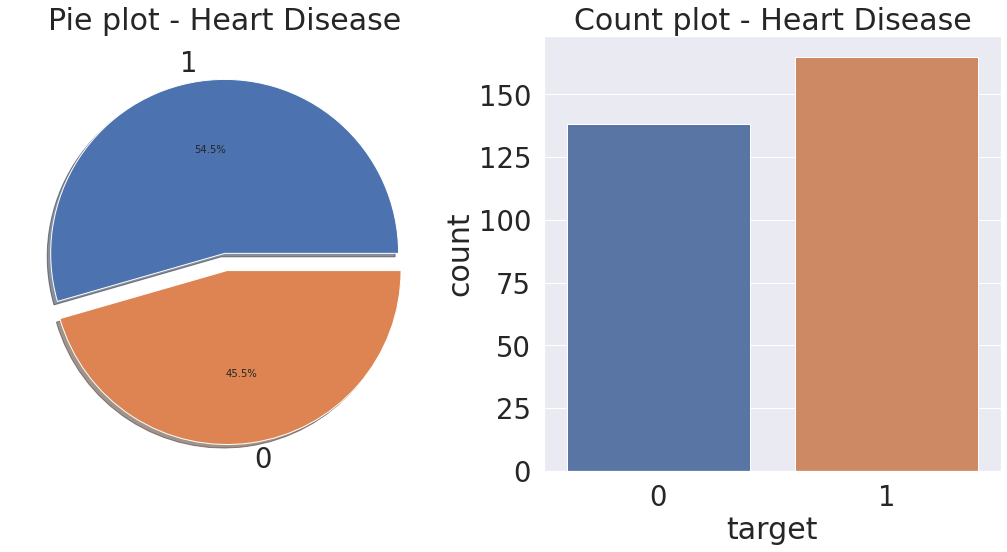

In [6]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
                     
df['target'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow = True)
ax[0].set_title('Pie plot - Heart Disease')
ax[0].set_ylabel('')
sns.countplot('target', data=df, ax=ax[1])
ax[1].set_title('Count plot - Heart Disease')
plt.show()

# EDA - CP(가슴 통증 유형)
0 - 전형적인 협심증, 1 - 비전형적인 협심증, 2 - 비협심증 통증, 3 - 증상 없음

In [7]:
df[['cp', 'target']].groupby(['cp'], as_index=True).count().sort_values(by='target', ascending=False) 

,target
cp,
0,143
2,87
1,50
3,23


In [8]:
pd.crosstab(df['cp'], df['target'], margins=True)

target,0,1,All
cp,,,
0,104,39,143
1,9,41,50
2,18,69,87
3,7,16,23
All,138,165,303


In [9]:
df[['cp', 'target']].groupby(['cp'], as_index=True).mean().sort_values(by='target', ascending=False)

,target
cp,
1,0.820000
2,0.793103
3,0.695652
0,0.272727


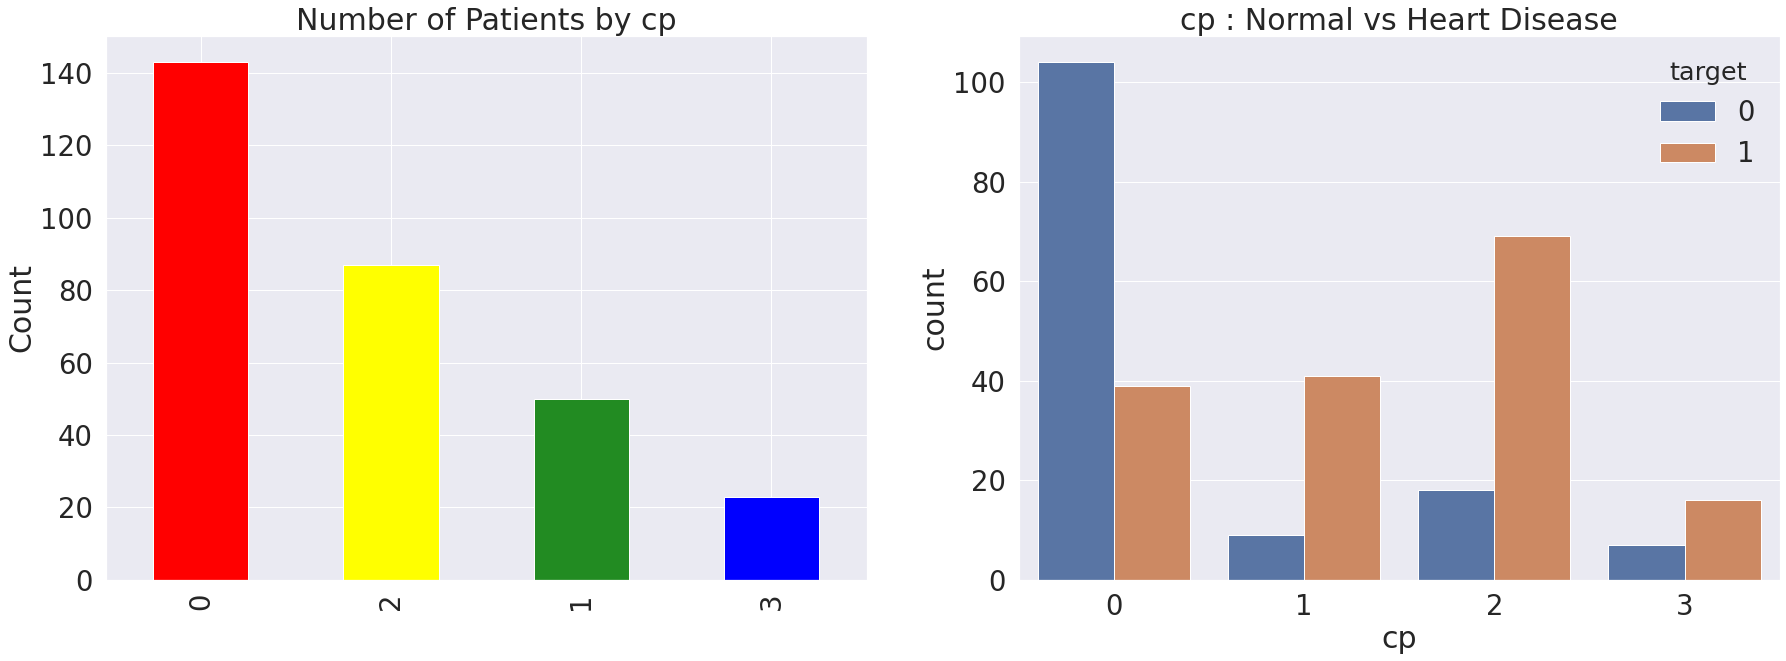

In [10]:
f, ax = plt.subplots(1, 2, figsize=(30, 10)) 
df['cp'].value_counts().plot.bar(color=['#ff0000', '#ffff00', '#228b22', '#0000ff'], ax=ax[0]) 
ax[0].set_title('Number of Patients by cp') 
ax[0].set_ylabel('Count') 
sns.countplot('cp', hue='target', data=df, ax=ax[1])
ax[1].set_title('cp : Normal vs Heart Disease') 
plt.show()

1(비전형적인 협심증), 2(비협심증 통증), 3(증상 없음), 0(전형적인 협심증) 순으로 심장별의 걸릴 확률이 높다.

# EDA - sex(성별)
1 - 남성, 0 - 여성

In [11]:
df[['sex', 'target']].groupby(['sex'], as_index=True).count() # Sex별 심장병 숫자

,target
sex,
0,96
1,207


In [12]:
pd.crosstab(df['sex'], df['target'], margins=True)

target,0,1,All
sex,,,
0,24,72,96
1,114,93,207
All,138,165,303


In [13]:
df[['sex', 'target']].groupby(['sex'], as_index=True).mean() # Sex별 심장병 비율

,target
sex,
0,0.750000
1,0.449275


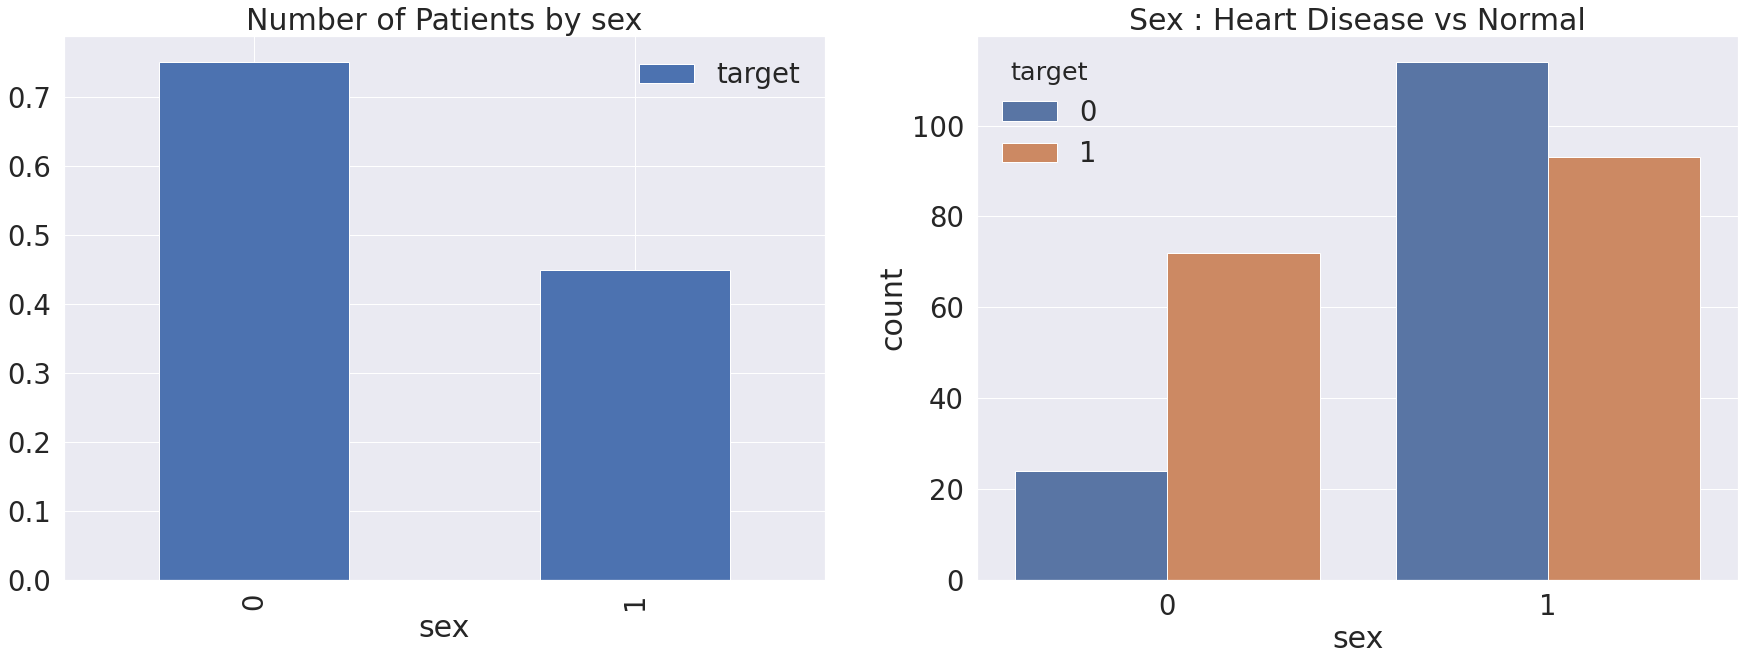

In [14]:
f, ax = plt.subplots(1, 2, figsize=(30, 10))
df[['sex', 'target']].groupby(['sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Number of Patients by sex')
sns.countplot('sex',hue='target', data=df, ax=ax[1]) 
ax[1].set_title('Sex : Heart Disease vs Normal')
plt.show()

남성보다 여성의 경우 심장병에 걸릴 확률이 높다.

# EDA - exang(협심증 유발 운동)
1 - yes, 0 - no

In [15]:
df[['exang', 'target']].groupby(['exang']).count()

,target
exang,
0,204
1,99


In [16]:
pd.crosstab(df['exang'], df['target'], margins = True)

target,0,1,All
exang,,,
0,62,142,204
1,76,23,99
All,138,165,303


In [17]:
df[['exang', 'target']].groupby(['exang']).mean()

,target
exang,
0,0.696078
1,0.232323


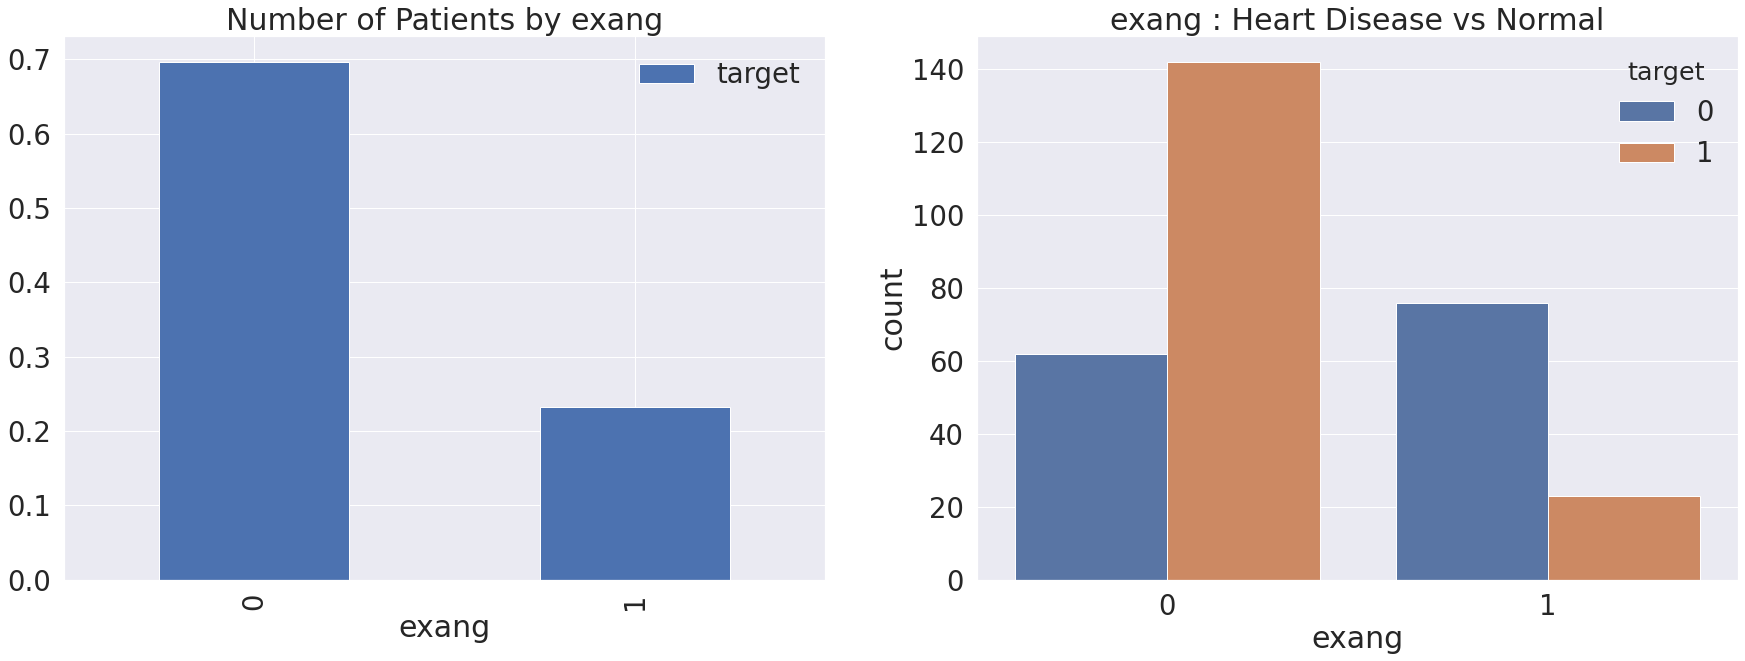

In [18]:
f, ax = plt.subplots(1, 2, figsize=(30, 10))
df[['exang', 'target']].groupby(['exang'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Number of Patients by exang')
sns.countplot('exang',hue='target', data=df, ax=ax[1]) 
ax[1].set_title('exang : Heart Disease vs Normal')
plt.show()

# EDA - age

In [19]:
df[['age']].describe()

,age
count,303.000000
mean,54.366337
std,9.082101
min,29.000000
25%,47.500000
50%,55.000000
75%,61.000000
max,77.000000


In [20]:
print("심장병 발병 환자 중 나이가 제일 많은 환자 : {:.1f} years".format(df[df["target"] == 1]["age"].max()))
print("심장병 발병 환자 중 나이가 제일 어린 환자 : {:.1f} years".format(df[df["target"] == 1]["age"].min()))
print("심장병 발병 환자 중 평균 나이 : {:.1f} years".format(df[df["target"] == 1]["age"].mean()))

심장병 발병 환자 중 나이가 제일 많은 환자 : 76.0 years
심장병 발병 환자 중 나이가 제일 어린 환자 : 29.0 years
심장병 발병 환자 중 평균 나이 : 52.5 years


In [21]:
pd.crosstab(df['target'], df['age'], margins = True)

age,29,34,35,37,38,39,40,41,42,43,...,66,67,68,69,70,71,74,76,77,All
target,,,,,,,,,,,,,,,,,,,,,
0,0,0,2,0,1,1,2,1,1,3,...,3,6,2,1,3,0,0,0,1,138
1,1,2,2,2,2,3,1,9,7,5,...,4,3,2,2,1,3,1,1,0,165
All,1,2,4,2,3,4,3,10,8,8,...,7,9,4,3,4,3,1,1,1,303


In [22]:
df[['age', 'target']].groupby(['target']).mean()

,age
target,
0,56.601449
1,52.496970


In [23]:
df[['age', 'target']].groupby(['age']).mean()

,target
age,
29,1.000000
34,1.000000
35,0.500000
37,1.000000
38,0.666667
39,0.750000
40,0.333333
41,0.900000
42,0.875000


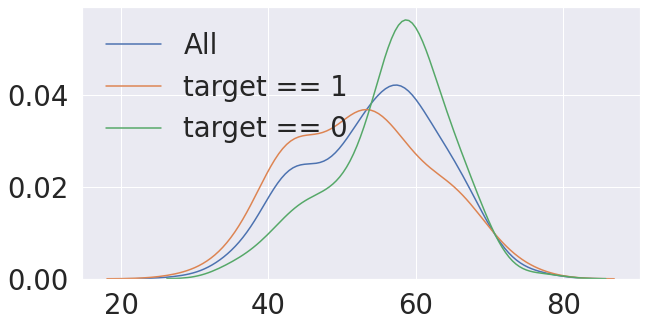

In [24]:
# 생존 여부에 따른 나이 확률 분포
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(df.age, ax = ax)
sns.kdeplot(df.age[df.target == 1], ax = ax)
sns.kdeplot(df.age[df.target == 0], ax = ax)
plt.legend(["All", "target == 1", "target == 0"])
plt.show()     

In [25]:
df[df["target"] == 1]["age"].sort_values()

72     29
58     34
125    34
157    35
65     35
       ..
60     71
25     71
151    71
129    74
144    76
Name: age, Length: 165, dtype: int64

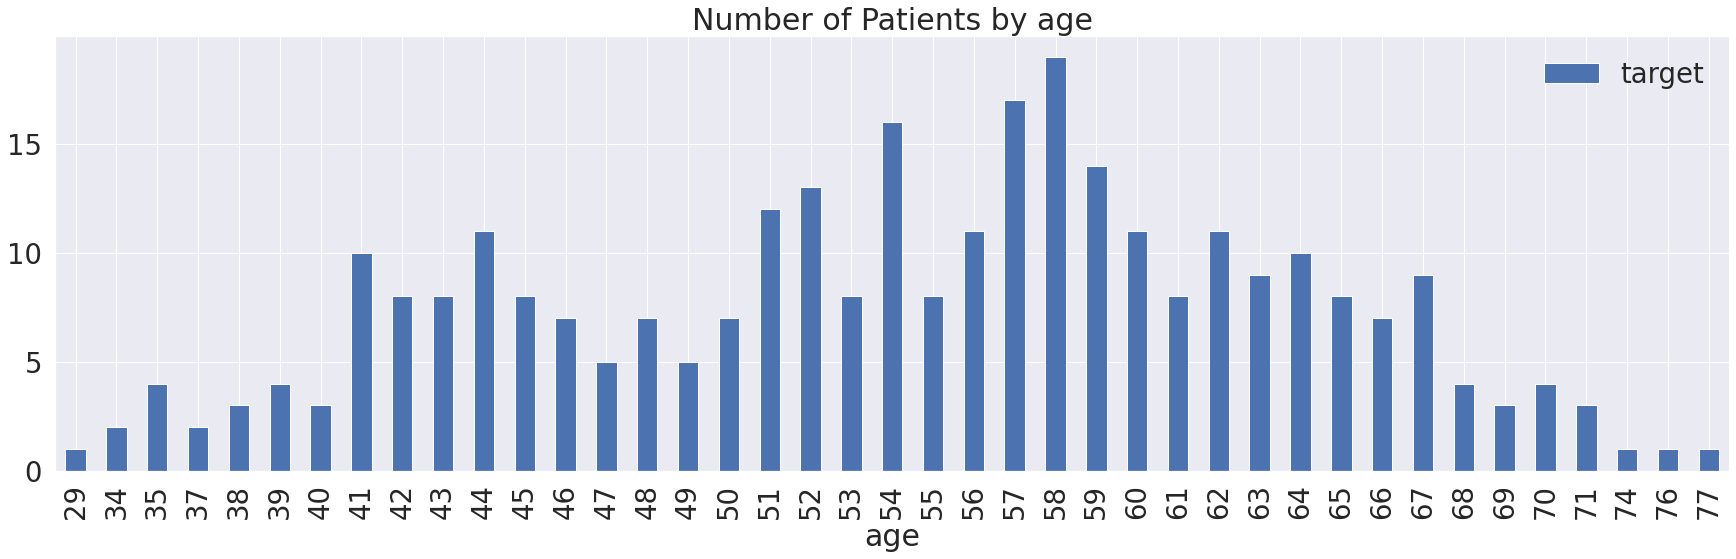

In [26]:
f, ax = plt.subplots(1, 1, figsize=(30, 8))
df[['age', 'target']].groupby(['age'], as_index=True).count().plot.bar(ax=ax)
ax.set_title('Number of Patients by age')
plt.show()

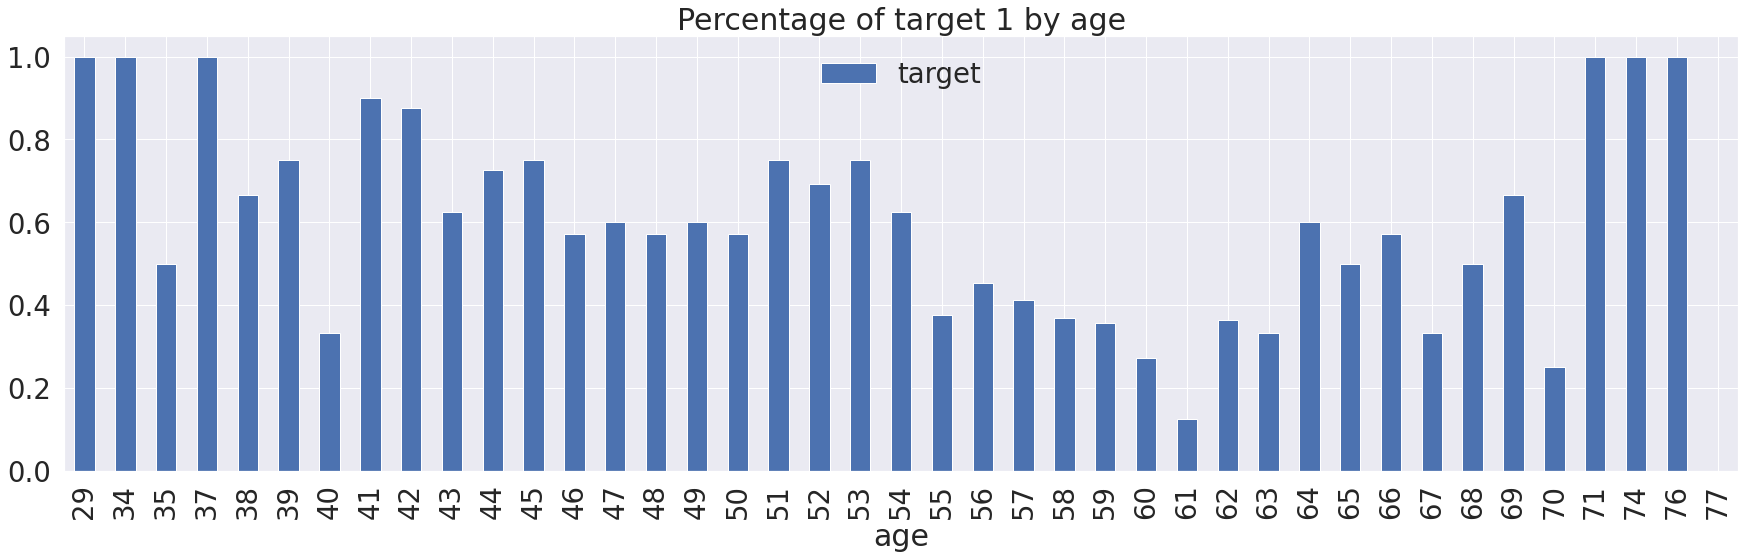

In [27]:
f, ax = plt.subplots(1, 1, figsize=(30, 8))
df[['age', 'target']].groupby(['age'], as_index=True).mean().plot.bar(ax=ax)
ax.set_title('Percentage of target 1 by age')
plt.show()

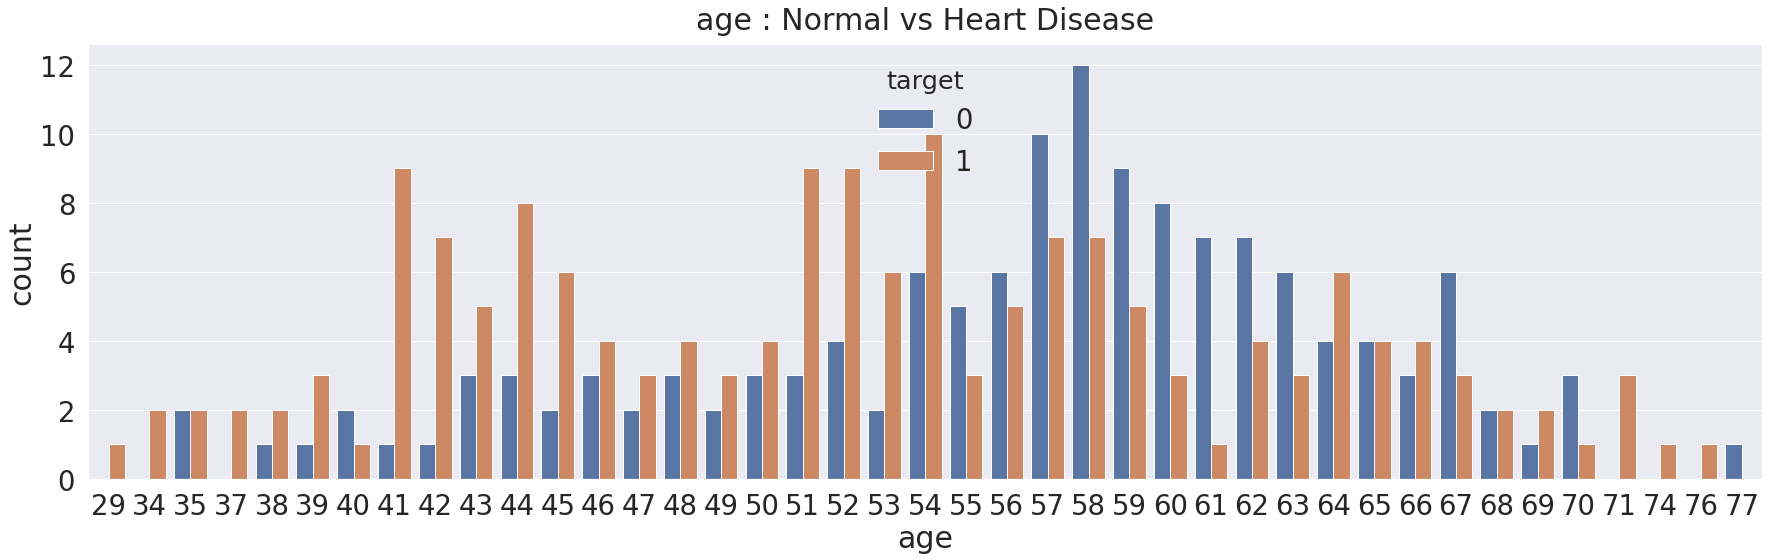

In [28]:
f, ax = plt.subplots(1, 1, figsize=(30, 8))
sns.countplot('age', hue='target', data=df, ax=ax)
ax.set_title('age : Normal vs Heart Disease', y = 1.02)
plt.show()

# EDA - thalach(최대 심장박동수)

In [29]:
df[['thalach']].describe()

,thalach
count,303.000000
mean,149.646865
std,22.905161
min,71.000000
25%,133.500000
50%,153.000000
75%,166.000000
max,202.000000


In [30]:
print("심장병 발병 환자 중 최대 심박동수 : {:.1f} bpm".format(df[df["target"] == 1]["thalach"].max()))
print("심장병 발병 환자 중 최소 심박동수 : {:.1f} bpm".format(df[df["target"] == 1]["thalach"].min()))
print("심장병 발병 환자 중 심박동수 평균 : {:.1f} bpm".format(df[df["target"] == 1]["thalach"].mean()))

심장병 발병 환자 중 최대 심박동수 : 202.0 bpm
심장병 발병 환자 중 최소 심박동수 : 96.0 bpm
심장병 발병 환자 중 심박동수 평균 : 158.5 bpm


In [31]:
pd.crosstab(df['thalach'], df['target'], margins = True)

target,0,1,All
thalach,,,
71,1,0,1
88,1,0,1
90,1,0,1
95,1,0,1
96,1,1,2
...,...,...,...
192,0,1,1
194,0,1,1
195,1,0,1


In [32]:
df[['thalach', 'target']].groupby(['thalach']).mean()

,target
thalach,
71,0.0
88,0.0
90,0.0
95,0.0
96,0.5
...,...
190,1.0
192,1.0
194,1.0


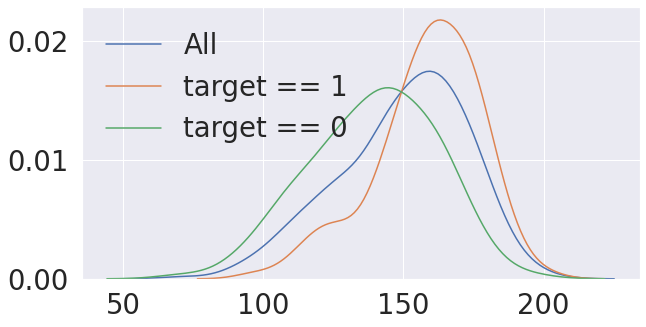

In [33]:
# 생존 여부에 따른 나이 확률 분포
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(df.thalach, ax = ax)
sns.kdeplot(df.thalach[df.target == 1], ax = ax)
sns.kdeplot(df.thalach[df.target == 0], ax = ax)
plt.legend(["All", "target == 1", "target == 0"])
plt.show()     

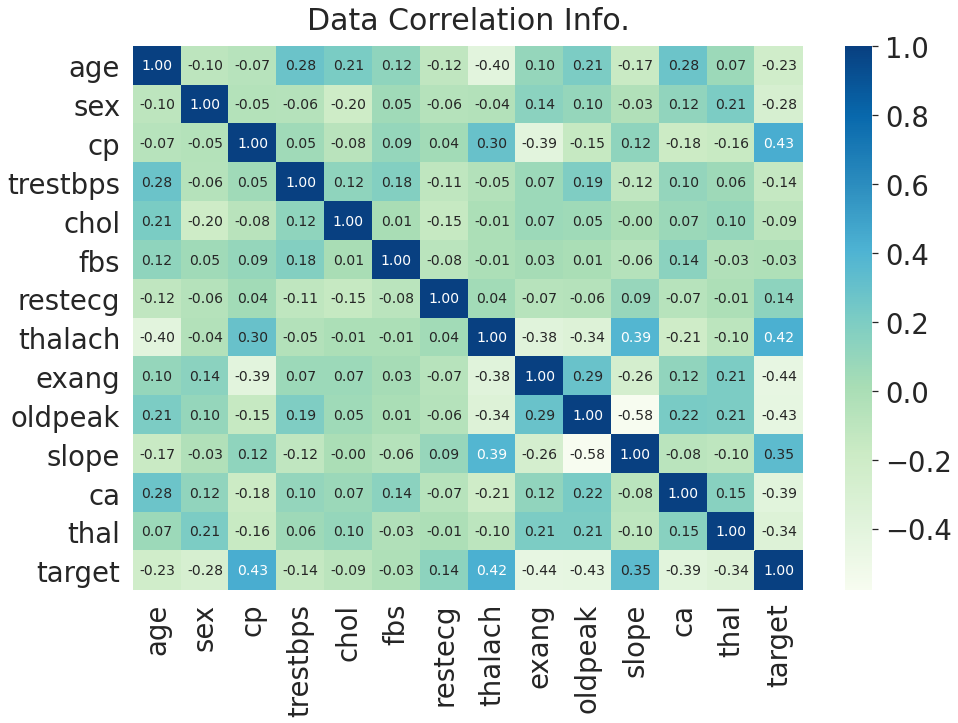

In [34]:
plt.figure(figsize=(15, 10))
plt.title("Data Correlation Info.", y = 1.02)
sns.heatmap(data = df.corr(), annot=True, annot_kws = {'size' : 14}, fmt = '.2f', cmap='GnBu')
plt.show()

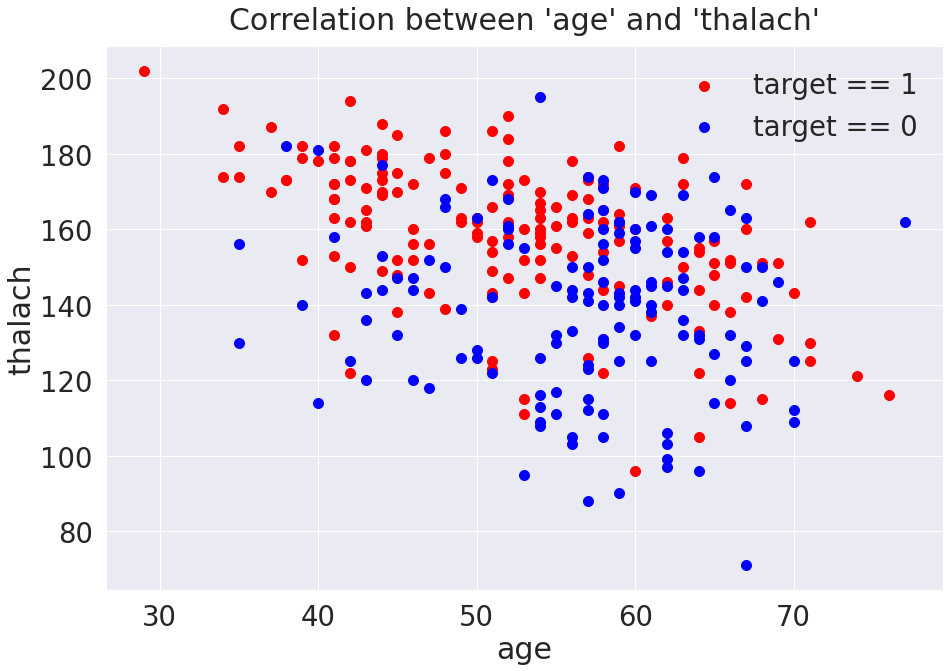

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c = 'red', s = 100)
plt.scatter(df.age[df.target == 0], y = df.thalach[df.target == 0], c = 'blue', s = 100)
plt.title("Correlation between 'age' and 'thalach'", y = 1.02)
plt.legend(["target == 1", "target == 0"])
plt.xlabel("age")
plt.ylabel("thalach")
plt.show()

# 데이터 준비

1. 행렬 생성

In [36]:
X_data = df.drop(["target"], axis = 1)
# Min-Max Normalization
X = (X_data - np.min(X_data))/(np.max(X_data)-np.min(X_data)).values
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


In [37]:
Y = df.target.values
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

2. 데이터 분리하기

In [38]:
from sklearn.model_selection import train_test_split

# train : validation : test = 64 : 16 : 20 / Stratify / seed = 0
X_t, X_test, Y_t, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state = 0)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_t, Y_t, test_size = 0.2, stratify = Y_t, random_state = 0)

X_train = X_train.T
X_validation = X_validation.T
X_test = X_test.T
X_train.shape
m = X_train.shape[1]  # m = Sample
n = X_train.shape[0]  # n = Feature

# 모델 함수 생성

1. Initialization

In [39]:
# w = (0.01, 0.01, ... , 0.01), b = 0.0
def Initialization(feature):
    w = np.full((feature, 1), 0.01)
    b = 0.0
    
    return w, b

2. Sigmoid

In [40]:
def Sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    
    return A

3. Forward & Backward Propagation

In [41]:
def Propagation(w, b, X_train, Y_train):
    # Forward
    Z = np.dot(w.T, X_train) + b
    A = Sigmoid(Z)
    loss = -(Y_train*np.log(A) + (1 - Y_train)*np.log(1 - A))
    cost = (np.sum(loss)) / m
    
    # Backward
    # da = (y/a) + (1-y)/(1-a)
    # dz = a - y
    dw = (1/m) * np.dot(X_train, (A - Y_train).T)
    db = (1/m) * np.sum(A - Y_train)
    
    # gradient dictionary
    grads = {"dw" : dw, "db" : db}
    
    return cost, grads

4. Update

In [42]:
def Update(w, b, X_train, Y_train, lr, iterations):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(iterations):
        cost, grads = Propagation(w, b, X_train, Y_train)
        cost_list.append(cost)
        
        w = w - lr * grads["dw"]
        b = b - lr * grads["db"]
        
        if i % 5 == 0: # 5번 마다 추가
            cost_list2.append(cost)
            index.append(i)
            
    parameters = {"w" : w, "b" : b}
    plt.plot(index, cost_list2)
    plt.xlabel("iter")
    plt.ylabel("cost")
    plt.show()
    
    return parameters, cost_list

5. Prediction

In [43]:
# Validation set
def Predict_validation(w, b, validation):
    Z = Sigmoid(np.dot(w.T, validation) + b)
    Y_prediction = np.zeros((1, validation.shape[1]))
    
    for i in range(Z.shape[1]):
        if Z[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
            
    return Y_prediction  

In [44]:
# Test set
def Predict_test(w, b, test):
    Z = Sigmoid(np.dot(w.T, test) + b)
    Y_prediction = np.zeros((1, test.shape[1]))
    
    for i in range(Z.shape[1]):
        if Z[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
            
    return Y_prediction  

6. Logistic Regression

In [45]:
X_train.shape

(13, 193)

In [46]:
def Logistic_regression(X_train, Y_train, X_validation, Y_validation, lr, iterations):
    feature = X_train.shape[0]
    w, b = Initialization(feature)
    
    parameters, cost_list = Update(w, b, X_train, Y_train, lr, iterations)
    
    Y_prediction_validation = Predict_validation(parameters["w"], parameters["b"], X_validation)
    
    print("Validation accuracy : {}%".format(100 - np.mean(np.abs(Y_prediction_validation - Y_validation))*100))
    
    return parameters

# 모델 생성

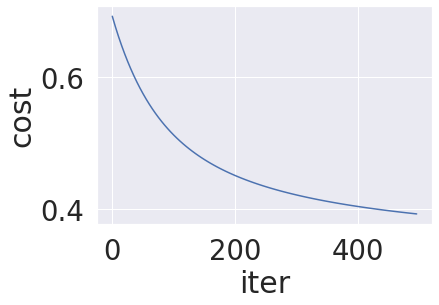

Validation accuracy : 77.55102040816327%


{'w': array([[-0.24639349],
        [-1.03602916],
        [ 1.69512317],
        [-0.22243419],
        [-0.0249773 ],
        [ 0.04173473],
        [ 0.39558264],
        [ 1.00754766],
        [-1.40633095],
        [-0.78065169],
        [ 1.14994591],
        [-1.137568  ],
        [-0.7533887 ]]),
 'b': 0.42582391755533505}

In [47]:
predicted_parameters = Logistic_regression(X_train, Y_train, X_validation, Y_validation, lr=0.1, iterations = 500)
predicted_parameters

In [48]:
X_test.T

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
24,0.229167,1.0,1.000000,0.433962,0.166667,0.0,0.5,0.816794,1.0,0.225806,1.0,0.00,1.000000
67,0.333333,0.0,0.333333,0.339623,0.246575,0.0,0.0,0.793893,0.0,0.096774,0.5,0.00,0.666667
13,0.729167,1.0,1.000000,0.150943,0.194064,0.0,0.0,0.557252,1.0,0.290323,0.5,0.00,0.666667
112,0.729167,0.0,0.666667,0.433962,0.426941,0.0,0.5,0.473282,0.0,0.032258,1.0,0.00,1.000000
80,0.250000,1.0,0.666667,0.169811,0.283105,0.0,0.5,0.824427,0.0,0.000000,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.562500,1.0,0.333333,0.245283,0.260274,0.0,0.5,0.748092,0.0,0.000000,0.0,0.00,0.666667
234,0.854167,1.0,0.000000,0.339623,0.447489,0.0,0.0,0.290076,0.0,0.387097,0.5,0.75,0.666667
110,0.729167,0.0,0.000000,0.811321,0.454338,0.0,0.5,0.633588,1.0,0.000000,1.0,0.00,0.666667
190,0.458333,0.0,0.000000,0.339623,0.408676,0.0,0.5,0.541985,1.0,0.193548,0.5,0.00,1.000000


# 예측

In [49]:
# 임의의 환자
patient_index = 234

# 예측 값
predicted_target = Predict_test(predicted_parameters["w"], predicted_parameters["b"], (X_test.T.loc[[patient_index]]).T)

# 실제 값
real_target = (df.loc[patient_index]['target'])

print("predicted:", int(predicted_target), "\nreal:", int(real_target))   

if (predicted_target == real_target):
    print("Model is correct")
else:
    print("Model is wrong")

predicted: 0 
real: 0
Model is correct
